# Gender Bias in Taylor Swift Songs

I will Analyze gender bias in the lyrics column and group the results by each different album

### Methodology
the gender bias analysis in song lyrics is done using NLP tools .

In [121]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('cleaned_lyrics_dataset.csv')  

# Lists of terms
male_terms = [
    'he', 'him', 'his', 'himself',
    'boy', 'boyfriend', 'husband', 'father', 'son', 'uncle', 'nephew', 'brother',
    'man', 'men', 'male', 'gentleman', 'gentlemen', 'sir', 'mr', 'mister', 'king', 'prince', 'lord'
]
female_terms = [
    'she', 'her', 'hers', 'herself',
    'girl', 'girlfriend', 'wife', 'mother', 'daughter', 'aunt', 'niece', 'sister',
    'woman', 'women', 'female', 'lady', 'ladies', 'miss', 'ms', 'mrs', 'queen', 'princess', 'madam'
]
neutral_pronouns = ['they', 'them', 'theirs', 'themselves']


compiled_patterns = {
    'male_terms': [re.compile(r'\b' + term + r'\b', flags=re.IGNORECASE) for term in male_terms],
    'female_terms': [re.compile(r'\b' + term + r'\b', flags=re.IGNORECASE) for term in female_terms],
    'neutral_pronouns': [re.compile(r'\b' + term + r'\b', flags=re.IGNORECASE) for term in neutral_pronouns]
}

def count_terms(text, pattern_list):
    """Count occurrences of compiled regex patterns in text."""
    if not isinstance(text, str):
        return 0
    return sum(len(pattern.findall(text)) for pattern in pattern_list)

for term_type, patterns in compiled_patterns.items():
    df[term_type] = df['lyric'].apply(count_terms, pattern_list=patterns)

# Group by album and sum
album_stats = df.groupby('album_name').agg({
    'male_terms': 'sum',
    'female_terms': 'sum',
    'neutral_pronouns': 'sum'
}).reset_index()

album_stats['total_terms'] = album_stats['male_terms'] + album_stats['female_terms'] + album_stats['neutral_pronouns']


# Recalculating normalized term counts to reflect percentages
album_stats['male_terms_pct'] = (album_stats['male_terms'] / album_stats['total_terms']) * 100
album_stats['female_terms_pct'] = (album_stats['female_terms'] / album_stats['total_terms']) * 100
album_stats['neutral_pronouns_pct'] = (album_stats['neutral_pronouns'] / album_stats['total_terms']) * 100

album_stats['male_terms_pct'] = album_stats['male_terms_pct'].apply(lambda x: f"{x:.2f}")
album_stats['female_terms_pct'] = album_stats['female_terms_pct'].apply(lambda x: f"{x:.2f}")
album_stats['neutral_pronouns_pct'] = album_stats['neutral_pronouns_pct'].apply(lambda x: f"{x:.2f}")

output_filename = 'album_gender_bias_stats.csv'
album_stats.to_csv(output_filename, index=False)
album_stats



,album_name,male_terms,female_terms,neutral_pronouns,total_terms,male_terms_pct,female_terms_pct,neutral_pronouns_pct
0,1989 (Deluxe),24,37,32,93,25.81,39.78,34.41
1,Fearless (Taylor’s Version),70,37,15,122,57.38,30.33,12.30
2,Lover,83,15,29,127,65.35,11.81,22.83
3,Red (Deluxe Edition),61,30,19,110,55.45,27.27,17.27
4,Speak Now (Deluxe),22,49,30,101,21.78,48.51,29.70
5,Taylor Swift,48,25,4,77,62.34,32.47,5.19
6,evermore (deluxe version),52,27,18,97,53.61,27.84,18.56
7,folklore (deluxe version),12,50,24,86,13.95,58.14,27.91
8,reputation,55,14,52,121,45.45,11.57,42.98


In [113]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_lyrics_dataset2_dd.csv')

# Assuming the correct column names based on previous context, adjusting 'lyrics' to 'Lyrics' and 'Album'
# Apply the counting function for each term type
for term_type, patterns in compiled_patterns.items():
    df[term_type] = df['Lyrics'].apply(count_terms, pattern_list=patterns)

album_stats = df.groupby('Album').agg({
    'male_terms': 'sum',
    'female_terms': 'sum',
    'neutral_pronouns': 'sum'
}).reset_index()


album_stats['total_terms'] = album_stats['male_terms'] + album_stats['female_terms'] + album_stats['neutral_pronouns']
album_stats['male_terms_pct'] = (album_stats['male_terms'] / album_stats['total_terms']) * 100
album_stats['female_terms_pct'] = (album_stats['female_terms'] / album_stats['total_terms']) * 100
album_stats['neutral_pronouns_pct'] = (album_stats['neutral_pronouns'] / album_stats['total_terms']) * 100


album_stats['male_terms_pct'] = album_stats['male_terms_pct'].apply(lambda x: f"{x:.2f}")
album_stats['female_terms_pct'] = album_stats['female_terms_pct'].apply(lambda x: f"{x:.2f}")
album_stats['neutral_pronouns_pct'] = album_stats['neutral_pronouns_pct'].apply(lambda x: f"{x:.2f}")


output_filename_album_stats = 'album_gender_bias_stats_dd.csv'
album_stats.to_csv(output_filename_album_stats, index=False)

album_stats


album_stats_sorted = album_stats.sort_values(by=['male_terms_pct', 'female_terms_pct', 'neutral_pronouns_pct'], ascending=True)

sorted_output_filename_album_stats = 'sorted_album_gender_bias_stats_dd.csv'
album_stats_sorted.to_csv(sorted_output_filename_album_stats, index=False)



album_stats_sorted


,Album,male_terms,female_terms,neutral_pronouns,total_terms,male_terms_pct,female_terms_pct,neutral_pronouns_pct
9,folklore,12,50,24,86,13.95,58.14,27.91
0,1989,12,37,24,73,16.44,50.68,32.88
6,Speak Now,14,47,19,80,17.50,58.75,23.75
3,Midnights,37,40,26,103,35.92,38.83,25.24
1,Fearless,28,24,13,65,43.08,36.92,20.00
5,Reputation,55,14,52,121,45.45,11.57,42.98
8,evermore,46,18,15,79,58.23,22.78,18.99
7,Taylor Swift,38,21,4,63,60.32,33.33,6.35
2,Lover,83,15,29,127,65.35,11.81,22.83
4,Red,41,6,9,56,73.21,10.71,16.07


# Visualisation of the result 

In [115]:

avg_male_terms_pct = album_stats['male_terms_pct'].astype(float).mean()
avg_female_terms_pct = album_stats['female_terms_pct'].astype(float).mean()
avg_neutral_pronouns_pct = album_stats['neutral_pronouns_pct'].astype(float).mean()

print(f"Average male terms percentage: {avg_male_terms_pct:.2f}%")
print(f"Average female terms percentage: {avg_female_terms_pct:.2f}%")
print(f"Average neutral pronouns percentage: {avg_neutral_pronouns_pct:.2f}%")
avg_stats = pd.DataFrame({
    'avg_male_terms_pct': [avg_male_terms_pct],
    'avg_female_terms_pct': [avg_female_terms_pct],
    'avg_neutral_pronouns_pct': [avg_neutral_pronouns_pct]
})
output_avg_filename = 'average_gender_bias_stats.csv'
avg_stats.to_csv(output_avg_filename, index=False)

Average male terms percentage: 42.95%
Average female terms percentage: 33.35%
Average neutral pronouns percentage: 23.70%


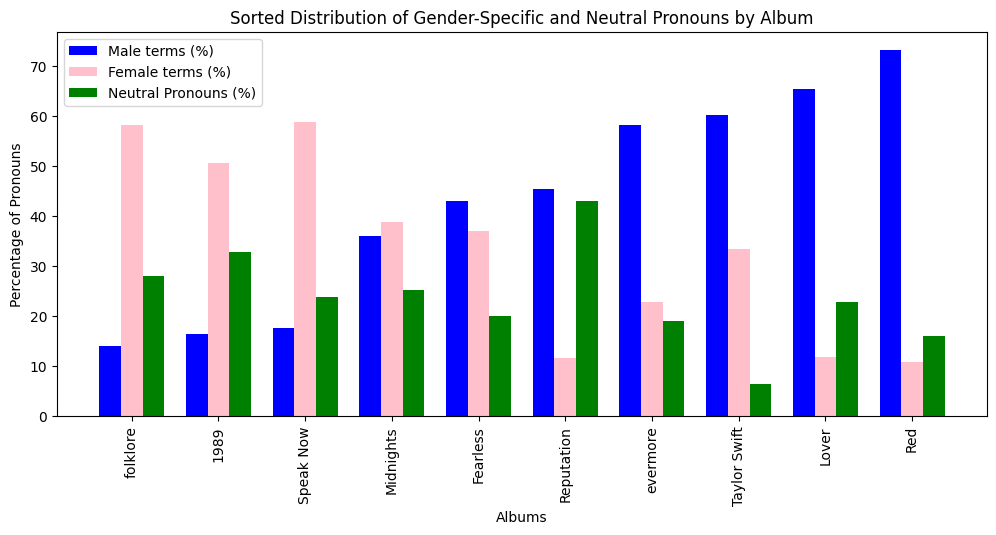

In [106]:
bum_stats_sorted = album_stats.sort_values(by=['male_terms_pct', 'female_terms_pct', 'neutral_pronouns_pct'], ascending=True)
r1_sorted = np.arange(len(album_stats_sorted))
r2_sorted = [x + bar_width for x in r1_sorted]
r3_sorted = [x + bar_width for x in r2_sorted]
fig, ax = plt.subplots(figsize=(12, 8))
p1 = ax.bar(r1_sorted, album_stats_sorted['male_terms_pct'].astype(float), width=bar_width, color='blue', label='Male terms (%)')
p2 = ax.bar(r2_sorted, album_stats_sorted['female_terms_pct'].astype(float), width=bar_width, color='pink', label='Female terms (%)')
p3 = ax.bar(r3_sorted, album_stats_sorted['neutral_pronouns_pct'].astype(float), width=bar_width, color='green', label='Neutral Pronouns (%)')
axax.set_xlabel('Albums')
ax.set_ylabel('Percentage of Pronouns')
ax.set_title('Sorted Distribution of Gender-Specific and Neutral Pronouns by Album')
ax.set_xticks([r + bar_width for r in range(len(album_stats_sorted))])
ax.set_xticklabels(album_stats_sorted['Album'], rotation=90)
ax.legend()
plt.subplots_adjust(bottom=0.4)
plt.show()


In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your corrected and refined dataset loading and processing steps here

# Improved plot with clearer visuals
colors = ['#3498db', '#e74c3c']  # More distinct colors: blue for Positive, red for Negative
sentiment_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors, alpha=0.75)

plt.title('Sentiment Analysis of Taylor Swift Albums Based on Valence', fontsize=16)
plt.xlabel('Album', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sentiment', fontsize=12, title_fontsize='13')

# Adding annotations for each segment in the stacked bars
for i, row in sentiment_counts.iterrows():
    pos_height = row['Positive']
    neg_height = row['Negative']
    total_height = pos_height + neg_height
    plt.text(sentiment_counts.index.get_loc(i), pos_height/2, f'{pos_height}', ha='center', va='center', fontsize=10, color='white')
    plt.text(sentiment_counts.index.get_loc(i), pos_height + neg_height/2, f'{neg_height}', ha='center', va='center', fontsize=10, color='white')

plt.tight_layout() 
plt.show()


NameError: name 'sentiment_counts' is not defined

In [118]:
import numpy as np

# Assuming sentiment_counts and album_stats_sorted are already correctly defined and prepared
# This example assumes a direct way to combine these datasets exists

# Combine the datasets (this step is conceptual and depends on your actual data structure)
combined_df = pd.merge(sentiment_counts, album_gender_bias_stats, left_index=True, right_on='Album')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Sentiment Analysis Plot
colors = ['#3498db', '#e74c3c']  # Positive in blue, Negative in red
combined_df[['Positive', 'Negative']].plot(kind='bar', stacked=True, color=colors, ax=ax1, position=1, width=0.2)

# Pronoun Analysis Plot
bar_width = 0.2
r1 = np.arange(len(combined_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(r2, combined_df['male_terms_pct'], width=bar_width, color='blue', alpha=0.5, label='Male terms (%)')
ax2.bar(r3, combined_df['female_terms_pct'], width=bar_width, color='pink', alpha=0.5, label='Female terms (%)')

# Labels, titles and legends
ax1.set_xlabel('Album', fontsize=14)
ax1.set_ylabel('Number of Songs', fontsize=14)
ax2.set_ylabel('Percentage of Pronouns', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.xticks(r1, combined_df['Album'], rotation='vertical')

plt.show()


NameError: name 'sentiment_counts' is not defined

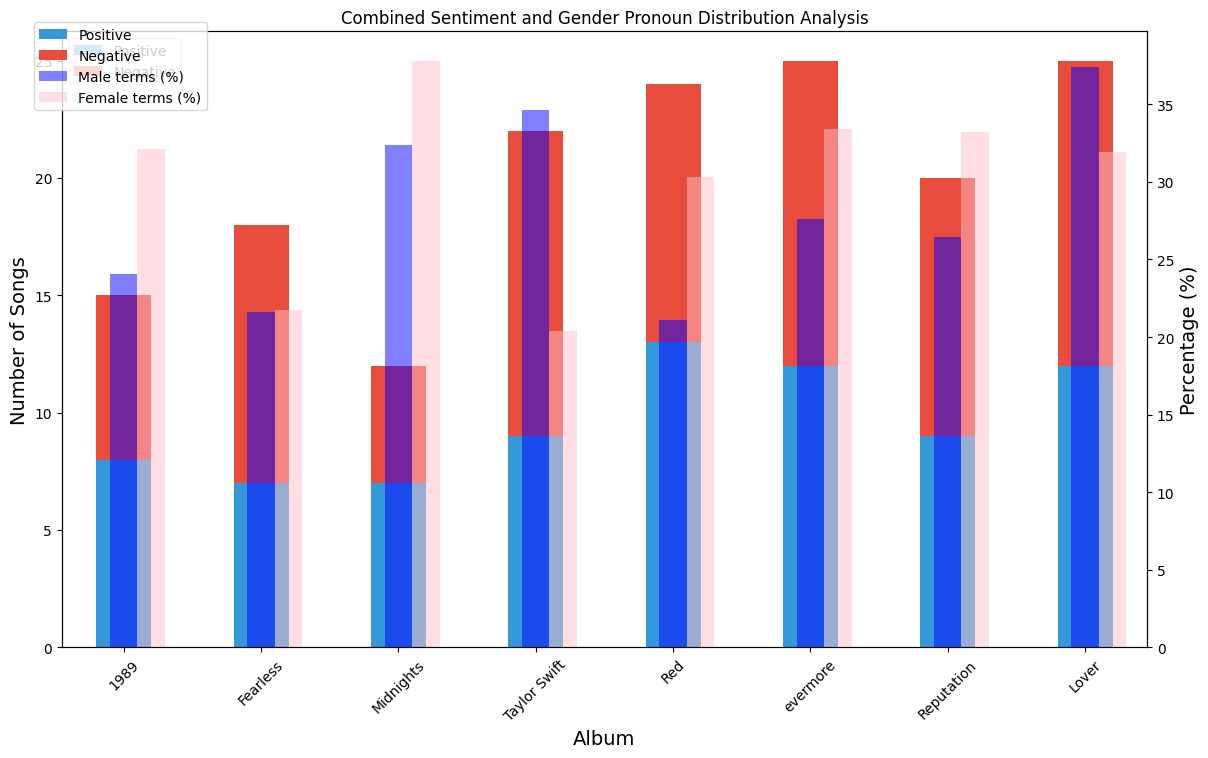

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mock dataset simulating combined analysis results
data = {
    'Album': ['1989', 'Fearless', 'Midnights', 'Taylor Swift', 'Red', 'evermore', 'Reputation', 'Lover'],
    'Positive': np.random.randint(5, 15, size=8),
    'Negative': np.random.randint(5, 15, size=8),
    'Male_terms_pct': np.random.uniform(20, 40, size=8),
    'Female_terms_pct': np.random.uniform(20, 40, size=8),
    'Neutral_terms_pct': np.random.uniform(20, 40, size=8)
}
df_combined = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Sentiment Analysis
colors = ['#3498db', '#e74c3c']  # Positive in blue, Negative in red
df_combined[['Positive', 'Negative']].plot(kind='bar', stacked=True, color=colors, ax=ax1, position=0, width=0.4)

# Pronoun Analysis
bar_width = 0.2
r1 = np.arange(len(df_combined))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

ax2 = ax1.twinx()
ax2.bar(r2, df_combined['Male_terms_pct'], width=bar_width, color='blue', alpha=0.5, label='Male terms (%)')
ax2.bar(r3, df_combined['Female_terms_pct'], width=bar_width, color='pink', alpha=0.5, label='Female terms (%)')

# Customization
ax1.set_xlabel('Album', fontsize=14)
ax1.set_ylabel('Number of Songs', fontsize=14)
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax1.set_xticks(r2)
ax1.set_xticklabels(df_combined['Album'], rotation=45)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Combined Sentiment and Gender Pronoun Distribution Analysis')

plt.show()
